In [ ]:
# 📌 Project Summary — IMDb Top 1000 Movies Dataset Analysis.
# The purpose of this project was to explore the IMDb Top 1000 Movies dataset (sourced from Kaggle) and perform end-to-end data analysis including cleaning, transformation, visualization, and insights extraction.

# 🔹 Dataset Overview
# The dataset contains details about the top-rated movies including:
# 1).Title, Release Year, Runtime, Genre
# 2).IMDb Rating, Meta Score
# 3).Cast and Director
# 4).Gross Revenue & Number of Votes

# 🚀 Conclusion
# This dataset gives deep insights into how audiences and critics perceive movies over decades. The project demonstrates:
# 1).Data Cleaning
# 2).Pandas operations
# 3).Grouping, Sorting, Filtering
# 4).Correlation Interpretation
# 5).Visual Analytics using Matplotlib / Seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')


# 1). Find the oldest and newest movie
print("\n----- Oldest and Newest Movie -----")
oldest = df["Released_Year"].min()
newest = df["Released_Year"].max()

oldest_movie = df[df["Released_Year"] == oldest][["Series_Title", "Released_Year", "IMDB_Rating"]]
newest_movie = df[df["Released_Year"] == newest][["Series_Title", "Released_Year", "IMDB_Rating"]]

print("Oldest Movie:\n", oldest_movie)
print("\nNewest Movie:\n", newest_movie)


----- Oldest and Newest Movie -----
Oldest Movie:
                      Series_Title  Released_Year  IMDB_Rating
321  Das Cabinet des Dr. Caligari         1920.0          8.1

Newest Movie:
                    Series_Title  Released_Year  IMDB_Rating
18                     Hamilton         2020.0          8.6
20              Soorarai Pottru         2020.0          8.6
205                        Soul         2020.0          8.1
464                 Dil Bechara         2020.0          7.9
612  The Trial of the Chicago 7         2020.0          7.8
613                        Druk         2020.0          7.8


In [2]:
# 2). Top 10 highest rated movies
print("\n----- Top 10 Highest Rated Movies -----")
highest_rated = df.sort_values("IMDB_Rating",ascending=False).head(10)
print(highest_rated[["Series_Title","Released_Year","IMDB_Rating","Director"]])


----- Top 10 Highest Rated Movies -----
                                     Series_Title  Released_Year  IMDB_Rating  \
0                        The Shawshank Redemption         1994.0          9.3   
1                                   The Godfather         1972.0          9.2   
4                                    12 Angry Men         1957.0          9.0   
2                                 The Dark Knight         2008.0          9.0   
3                          The Godfather: Part II         1974.0          9.0   
5   The Lord of the Rings: The Return of the King         2003.0          8.9   
7                                Schindler's List         1993.0          8.9   
6                                    Pulp Fiction         1994.0          8.9   
8                                       Inception         2010.0          8.8   
12                Il buono, il brutto, il cattivo         1966.0          8.8   

                Director  
0         Frank Darabont  
1   Francis F

In [3]:
# 3). Top 10 most voted movies
print("\n----- Top 10 Most Voted Movies -----")
highest_voted = df.sort_values("No_of_Votes",ascending=False).head(10)
print(highest_voted[["Series_Title","Released_Year","IMDB_Rating","Director","No_of_Votes"]])


----- Top 10 Most Voted Movies -----
                                         Series_Title  Released_Year  \
0                            The Shawshank Redemption         1994.0   
2                                     The Dark Knight         2008.0   
8                                           Inception         2010.0   
9                                          Fight Club         1999.0   
6                                        Pulp Fiction         1994.0   
11                                       Forrest Gump         1994.0   
14                                         The Matrix         1999.0   
10  The Lord of the Rings: The Fellowship of the Ring         2001.0   
5       The Lord of the Rings: The Return of the King         2003.0   
1                                       The Godfather         1972.0   

    IMDB_Rating              Director  No_of_Votes  
0           9.3        Frank Darabont      2343110  
2           9.0     Christopher Nolan      2303232  
8         

In [4]:
# 4). Highest rated movies released after year 2000
print("\n----- Highest Rated Movies After 2000 -----")
df_2000 = df[df["Released_Year"] > 2000]
highest_rated = df_2000.sort_values("IMDB_Rating",ascending=False).head(10)
print(highest_rated[["Series_Title","Released_Year","IMDB_Rating","Director"]])


----- Highest Rated Movies After 2000 -----
                                         Series_Title  Released_Year  \
2                                     The Dark Knight         2008.0   
5       The Lord of the Rings: The Return of the King         2003.0   
10  The Lord of the Rings: The Fellowship of the Ring         2001.0   
8                                           Inception         2010.0   
13              The Lord of the Rings: The Two Towers         2002.0   
22                                     Cidade de Deus         2002.0   
23                      Sen to Chihiro no kamikakushi         2001.0   
21                                       Interstellar         2014.0   
20                                    Soorarai Pottru         2020.0   
18                                           Hamilton         2020.0   

    IMDB_Rating            Director  
2           9.0   Christopher Nolan  
5           8.9       Peter Jackson  
10          8.8       Peter Jackson  
8         

In [5]:
# 5). Shortest and longest runtime movies
print("\n----- Shortest and Longest Runtime Movies -----")

shortest = df["Runtime"].min()
longest = df["Runtime"].max()

shortest_movie = df[df["Runtime"] == shortest][["Series_Title", "Runtime", "IMDB_Rating","Released_Year","Director"]]
longest_movie = df[df["Runtime"] == longest][["Series_Title", "Runtime", "IMDB_Rating","Released_Year","Director"]]

print("\nShortest Movie:\n", shortest_movie)
print("\nLongest Movie:\n", longest_movie)


----- Shortest and Longest Runtime Movies -----

Shortest Movie:
      Series_Title  Runtime  IMDB_Rating  Released_Year       Director
194  Sherlock Jr.       45          8.2         1924.0  Buster Keaton

Longest Movie:
            Series_Title  Runtime  IMDB_Rating  Released_Year        Director
140  Gangs of Wasseypur      321          8.2         2012.0  Anurag Kashyap


In [6]:
# 6). All movies directed by Christopher Nolan
print("\n----- Movies Directed By Christopher Nolan -----")
director = df[df["Director"] == "Christopher Nolan"]
highest_rated = director.sort_values("IMDB_Rating",ascending=False)
print(highest_rated[["Series_Title","Released_Year","IMDB_Rating","Director"]])


----- Movies Directed By Christopher Nolan -----
              Series_Title  Released_Year  IMDB_Rating           Director
2          The Dark Knight         2008.0          9.0  Christopher Nolan
8                Inception         2010.0          8.8  Christopher Nolan
21            Interstellar         2014.0          8.6  Christopher Nolan
36            The Prestige         2006.0          8.5  Christopher Nolan
63   The Dark Knight Rises         2012.0          8.4  Christopher Nolan
69                 Memento         2000.0          8.4  Christopher Nolan
155          Batman Begins         2005.0          8.2  Christopher Nolan
573                Dunkirk         2017.0          7.8  Christopher Nolan


In [7]:
# 7). Directors with at least 3 movies and highest average rating
print("\n----- Directors With Highest Avg Rating (Min 3 Movies) -----")
director_group = df.groupby("Director").agg(
    avg_rating = ("IMDB_Rating", "mean"),
    movie_count = ("Series_Title", "count")
)

director_group = director_group[director_group["movie_count"] >= 3]
highest = director_group.sort_values("avg_rating", ascending=False).head(10)
print(highest) 


----- Directors With Highest Avg Rating (Min 3 Movies) -----
                      avg_rating  movie_count
Director                                     
Christopher Nolan       8.462500            8
Peter Jackson           8.400000            5
Francis Ford Coppola    8.400000            5
Charles Chaplin         8.333333            6
Sergio Leone            8.266667            6
Stanley Kubrick         8.233333            9
Akira Kurosawa          8.220000           10
Frank Capra             8.200000            4
Quentin Tarantino       8.175000            8
Rajkumar Hirani         8.175000            4


In [8]:
# 8). Top 10 highest grossing movies
print("\n----- Top 10 Highest Grossing Movies -----")
highest_Gross = df.sort_values("Gross",ascending=False).head(10)
print(highest_Gross[["Series_Title","Released_Year","IMDB_Rating","Director","Gross"]])


----- Top 10 Highest Grossing Movies -----
                                   Series_Title  Released_Year  IMDB_Rating  \
477  Star Wars: Episode VII - The Force Awakens         2015.0          7.9   
59                            Avengers: Endgame         2019.0          8.4   
623                                      Avatar         2009.0          7.8   
60                       Avengers: Infinity War         2018.0          8.4   
652                                     Titanic         1997.0          7.8   
357                                The Avengers         2012.0          8.0   
891                               Incredibles 2         2018.0          7.6   
2                               The Dark Knight         2008.0          9.0   
582                                   Rogue One         2016.0          7.8   
63                        The Dark Knight Rises         2012.0          8.4   

              Director        Gross  
477        J.J. Abrams  936662225.0  
59       A

In [9]:
# 9). Genre wise avg rating and movie count
print("\n----- Genre Wise Average Rating & Movie Count -----")
df_genre = df.assign(Genre = df["Genre"].str.split(", ")).explode("Genre")

grouped = df_genre.groupby("Genre").agg(
    avg_rating = ("IMDB_Rating", "mean"),
    movie_count = ("Series_Title", "count")
)
print(grouped.sort_values("avg_rating", ascending=False).head(10))


----- Genre Wise Average Rating & Movie Count -----
           avg_rating  movie_count
Genre                             
War          8.013725           51
Western      8.000000           20
Film-Noir    7.989474           19
Sci-Fi       7.977612           67
Mystery      7.967677           99
Drama        7.959392          724
Crime        7.954545          209
History      7.953571           56
Adventure    7.952041          196
Action       7.948677          189


In [10]:
# 10). Top actors by number of movies
print("\n----- Top Actors By Number of Movies -----")
df_actor = df[["Star1", "Star2", "Star3", "Star4"]].melt(value_name="Actor")["Actor"]
actor_count = df_actor.value_counts().head(10)
print(actor_count)


----- Top Actors By Number of Movies -----
Actor
Robert De Niro       17
Tom Hanks            14
Al Pacino            13
Clint Eastwood       12
Brad Pitt            12
Leonardo DiCaprio    11
Matt Damon           11
Christian Bale       11
James Stewart        10
Denzel Washington     9
Name: count, dtype: int64


In [11]:
# 11). Certificate category rating and movie count
print("\n----- Rating & Movie Count By Certificate Category -----")
grouped = df.groupby("Certificate").agg(
    avg_rating = ("IMDB_Rating", "mean"),
    movie_count = ("Series_Title", "count")
)

print(grouped.sort_values("movie_count", ascending=False))


----- Rating & Movie Count By Certificate Category -----
             avg_rating  movie_count
Certificate                         
U              7.976923          234
A              7.998985          197
UA             7.957143          175
R              7.869863          146
Unknown        7.931683          101
PG-13          7.797674           43
PG             7.927027           37
Passed         8.020588           34
G              8.000000           12
Approved       7.945455           11
TV-PG          7.900000            3
GP             7.850000            2
16             8.100000            1
TV-14          8.300000            1
TV-MA          8.100000            1
U/A            7.600000            1
Unrated        8.100000            1


In [12]:
# 12). Top actors with highest avg rating (min 5 films)
print("\n----- Top Actors With Highest Avg Rating (Min 5 Movies) -----")
actors_df = df.melt(
    id_vars=["Series_Title", "IMDB_Rating"],
    value_vars=["Star1", "Star2", "Star3", "Star4"],
    var_name="Actor_Position",
    value_name="Actor"
)

actor_group = actors_df.groupby("Actor").agg(
    avg_rating=("IMDB_Rating", "mean"),
    movie_count=("Series_Title", "count")
)
actor_group = actor_group[actor_group["movie_count"] >= 5]
top_actors = actor_group.sort_values("avg_rating", ascending=False).head(10)
print(top_actors)


----- Top Actors With Highest Avg Rating (Min 5 Movies) -----
                 avg_rating  movie_count
Actor                                   
Charles Chaplin    8.333333            6
Kevin Spacey       8.300000            5
Harrison Ford      8.262500            8
Viggo Mortensen    8.260000            5
Tatsuya Nakadai    8.250000            6
Toshirô Mifune     8.242857            7
Aamir Khan         8.237500            8
Diane Keaton       8.233333            6
Ian McKellen       8.214286            7
Morgan Freeman     8.185714            7


In [13]:
# 13). Year wise total movies & rating trend
print("\n----- Year Wise Movie Count & Avg Rating -----")
grouped = df.groupby("Released_Year").agg(
    avg_rating = ("IMDB_Rating", "mean"),
    movie_count = ("Series_Title", "count")
)

print("Most Movies Produced:\n", grouped.sort_values("movie_count", ascending=False).head(5))
print("Least Movies Produced:\n", grouped.sort_values("movie_count").head(5))


----- Year Wise Movie Count & Avg Rating -----
Most Movies Produced:
                avg_rating  movie_count
Released_Year                         
2014.0           7.918750           32
2004.0           7.874194           31
2009.0           7.865517           29
2013.0           7.921429           28
2016.0           7.935714           28
Least Movies Produced:
                avg_rating  movie_count
Released_Year                         
1920.0                8.1            1
1921.0                8.3            1
1922.0                7.9            1
1924.0                8.2            1
1926.0                8.1            1


In [14]:
# 14). Highly rated but low gross & low rated but high gross
print("\n----- Top 10 Highly Rated But Low Gross -----")
high_rating_low_gross = df.sort_values(["IMDB_Rating", "Gross"], ascending=[False, True]).head(10)
print(high_rating_low_gross[["Series_Title","IMDB_Rating","Gross","Director"]])

print("\n----- Top 10 Low Rated But High Gross -----")
low_rating_high_gross = df.sort_values(["IMDB_Rating","Gross"], ascending=[True,False]).head(10)
print(low_rating_high_gross[["Series_Title","IMDB_Rating","Gross","Director"]])


----- Top 10 Highly Rated But Low Gross -----
                                     Series_Title  IMDB_Rating        Gross  \
0                        The Shawshank Redemption          9.3   28341469.0   
1                                   The Godfather          9.2  134966411.0   
4                                    12 Angry Men          9.0    4360000.0   
3                          The Godfather: Part II          9.0   57300000.0   
2                                 The Dark Knight          9.0  534858444.0   
7                                Schindler's List          8.9   96898818.0   
6                                    Pulp Fiction          8.9  107928762.0   
5   The Lord of the Rings: The Return of the King          8.9  377845905.0   
12                Il buono, il brutto, il cattivo          8.8    6100000.0   
9                                      Fight Club          8.8   37030102.0   

                Director  
0         Frank Darabont  
1   Francis Ford Coppola  
4 

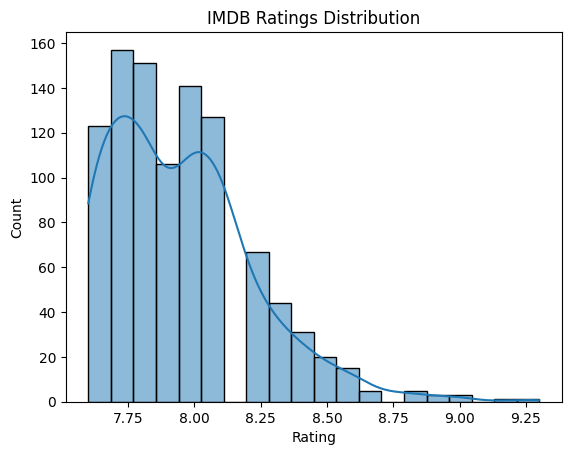

In [15]:
# 15). Distribution of IMDB Ratings
# This shows how ratings are spread and helps identify if most movies are highly rated or average.
sns.histplot(df["IMDB_Rating"], bins=20, kde=True)
plt.title("IMDB Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

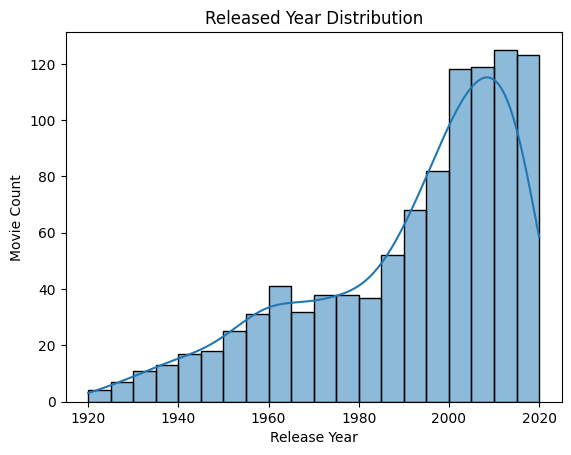

In [16]:
# 16). Number of Movies Released Each Year
# Helps detect whether movie production increased or reduced over time.
sns.histplot(df["Released_Year"], bins=20, kde=True)
plt.title("Released Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Movie Count")
plt.show()

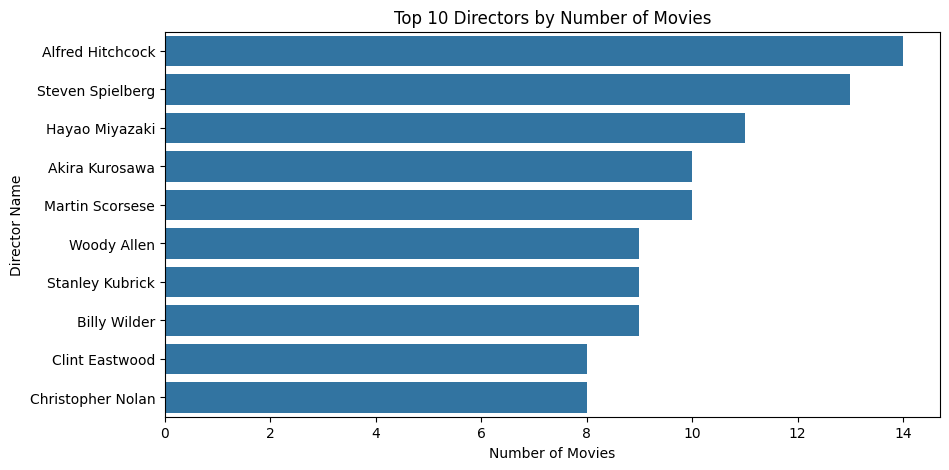

In [17]:
# 17). Top 10 Directors by Number of Movies
# Shows which directors have contributed the most movies in top IMDb list.
director_count = df['Director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=director_count.values, y=director_count.index)
plt.title("Top 10 Directors by Number of Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Director Name")
plt.show()

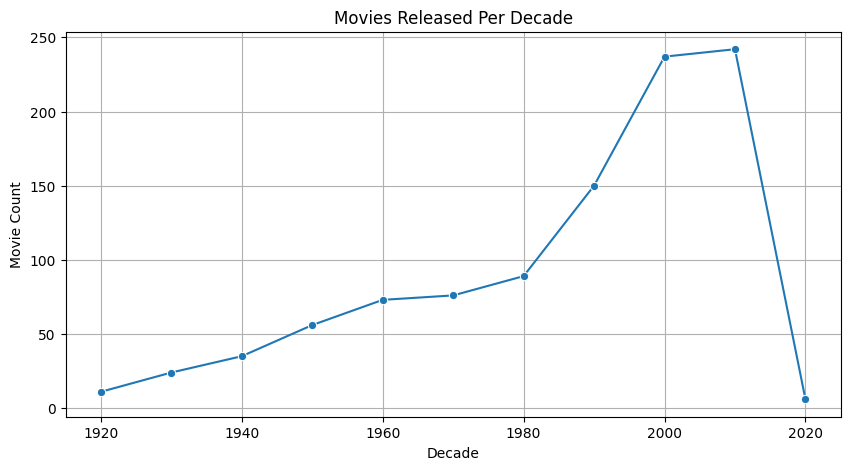

In [18]:
# 18). Number of Movies Released Per Decade
# Shows trend over decades — Golden age vs modern era comparison.
df["Decade"] = (df["Released_Year"] // 10) * 10
decade_count = df["Decade"].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=decade_count.index, y=decade_count.values, marker="o")
plt.title("Movies Released Per Decade")
plt.xlabel("Decade")
plt.ylabel("Movie Count")
plt.grid(True)
plt.show()

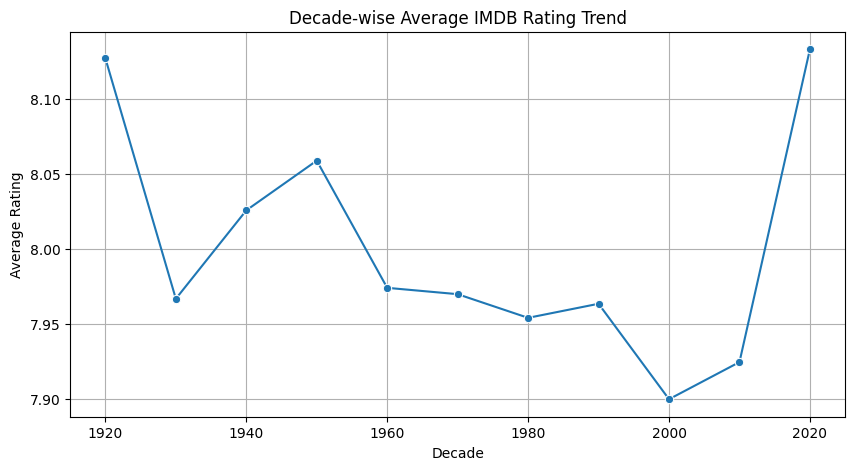

In [19]:
# 19). Decade wise average rating trend
df["Decade"] = (df["Released_Year"] // 10) * 10
decade_avg_rating = df.groupby("Decade")["IMDB_Rating"].mean().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=decade_avg_rating.index, y=decade_avg_rating.values, marker="o")
plt.title("Decade-wise Average IMDB Rating Trend")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

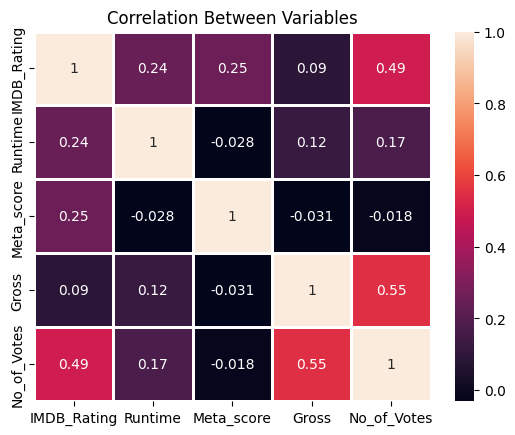

In [20]:
# 20). Correlation Heatmap
sns.heatmap(df[["IMDB_Rating","Runtime","Meta_score","Gross","No_of_Votes"]].corr(), annot=True, linewidths=1)
plt.title("Correlation Between Variables")
plt.show()